## Origem dos dados
Os dados disponíveis no link oficial http://dadosabertos.mec.gov.br/prouni. São originais e não sofreram qualquer tratamento.
Eles foram baixados em 15/03/2021 às 9:33 AM. 

Autores e mantenedor dos dados originais são: 
Autor:	Diretoria de Políticas e Programas de Graduação (DIPES) e Secretaria de Educação Superior (SESu) do Ministério da Educação (MEC)
Mantenedor:	Escritório de Gestão de Dados e Informação Estratégica - EGDIE/SE/MEC

## Introdução aos dados

Esses dados tem detalhamentos quantitativo das bolsas concedidas pelo Prouni por ano, segmentado por região; UF; Município; instituiçao de ensino superior; curso; modalidade de ensino (presencial ou a distância); turno e tipo de bolsa. Detalhamento do perfil dos beneficiários do Prouni por sexo; raça / cor; faixa etária e pessoas com deficiência.

Além disso, foi feita, 

Inicialmente entramos em contato com Marciano Saraiva (https://www.kaggle.com/saraivaufc/prouni), dono do dataset no Kaggle, mas resolvemos pegar os dados diretamente do portal do MEC por fins de transparência.

Para fins avaliativos nessa disciplina, usaremos apenas os dados de 2019, ou seja, um dataset dos 14 existentes. Caso haja a necessidade no segundo projeto da disciplina pegar mais dados, assim faremos. Mas para nível de escopo esse dataset é sufieciente. Se desejarmos posteriormente fazer uma maior elaboracão para um artigo cientifico, por exemplo, fica aqui registrada a documentação dos processos. 

O dataframe df2019 diz respeito aos dados de 2019 (+200K linhas).

**Obs: Utilizado aqui para exercitar a limpeza e o pré-processamento dos dados, e utilizaremos os dados de 2019 para todas as etapas desse primeiro projeto. 

## Bônus		 

Integrar dados ou extrair dados da	Web:

Uma análise que desde o princípio tivemos interesse em fazer é a comparação entre local de origem do(a) estudante e local da instituição de ensino em que se cadastrou no prouni, a partir daí fomos em busca de datasets onde poderia haver o dado correspondente ao local da IES (Instituição de Ensino Superior) e seu código emec para que fosse feita a relação entre os dados, a primórdio usamos o dataset do fies, após analisar que haviam muitos dados faltantes, 13.09% (29511/225556) dos dados não foram relacionados, então procuramos outro dataset com essas informações e encontramos o que está disponível no link abaixo, também disponibilizado em um portal governamental:
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/indicadores-de-qualidade-da-educacao-superior
o mesmo processo de integração foi feito, e a quantidade de dados faltantes foi de 7.27% (16402/225556), logo o escolhemos, o processo de agregação está presente no arquivo: https://github.com/godsavemenow/ProuniDataAnalysis/blob/main/DataAgregationenade.py

OBS: optamos por manter um valor generalizado (conceito enade de um curso da IES foi utilizado para todos os cursos da mesma IES), por questões didáticas e para que tivessemos um valor numérico que pudesse passar pelos processos apresentados em aula,  





## Coletar de dados

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
from math import log
 
# from matplotlib import pyplot as plt
# from ggplot import *
 
import seaborn as sns
 
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource

 
# import plotly.plotly as py
import plotly.graph_objs as go

#Set date format
to_datetime = lambda d: datetime.strptime(d, '%d/%m/%Y')

#Define fields data type
df2019type = {'ANO_CONCESSAO_BOLSA': 'int64', 'CODIGO_EMEC_IES_BOLSA':'int64','NOME_IES_BOLSA': 'category', 'NOME_IES_BOLSA': 'category', 'NOME_IES_BOLSA': 'category','TIPO_BOLSA':'category','MODALIDADE_ENSINO_BOLSA':'category','NOME_CURSO_BOLSA':'category','NOME_TURNO_CURSO_BOLSA':'category','CPF_BENEFICIARIO_BOLSA':'category','SEXO_BENEFICIARIO_BOLSA':'category','RACA_BENEFICIARIO_BOLSA':'category','BENEFICIARIO_DEFICIENTE_FISICO':'category','REGIAO_BENEFICIARIO_BOLSA':'category','SIGLA_UF_BENEFICIARIO_BOLSA':'category','MUNICIPIO_BENEFICIARIO_BOLSA':'category','Código da IES':'category','Nome da IES':'category','Sigla da IES':'category','Organização Acadêmica':'category','Categoria Administrativa':'category','Município do Curso':'category','Sigla da UF':'category','Conceito Enade (Contínuo)': 'float64','Conceito Enade (Faixa)':'category'}

#Load data from csv files on github
df=pd.read_csv("https://raw.githubusercontent.com/godsavemenow/iesData/master/agregateddataenade2019.csv", dtype = df2019type, converters= {'DT_NASCIMENTO_BENEFICIARIO': to_datetime}, engine= 'python', delimiter=';', decimal = ',')

print(df.dtypes)
df.head()

ANO_CONCESSAO_BOLSA                        int64
CODIGO_EMEC_IES_BOLSA                      int64
NOME_IES_BOLSA                          category
TIPO_BOLSA                              category
MODALIDADE_ENSINO_BOLSA                 category
NOME_CURSO_BOLSA                        category
NOME_TURNO_CURSO_BOLSA                  category
CPF_BENEFICIARIO_BOLSA                  category
SEXO_BENEFICIARIO_BOLSA                 category
RACA_BENEFICIARIO_BOLSA                 category
DT_NASCIMENTO_BENEFICIARIO        datetime64[ns]
BENEFICIARIO_DEFICIENTE_FISICO          category
REGIAO_BENEFICIARIO_BOLSA               category
SIGLA_UF_BENEFICIARIO_BOLSA             category
MUNICIPIO_BENEFICIARIO_BOLSA            category
Código da IES                           category
Nome da IES                             category
Sigla da IES                            category
Organização Acadêmica                   category
Categoria Administrativa                category
Município do Curso  

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Município do Curso,Sigla da UF,Conceito Enade (Contínuo),Conceito Enade (Faixa)
0,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***03183970**,M,Branca,1993-08-19,N,Sul,PR,LONDRINA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4
1,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***92848904**,F,Branca,1999-11-03,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4
2,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***12457929**,M,Parda,1999-04-02,N,Sul,PR,QUATRO BARRAS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4
3,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***21386908**,M,Branca,2000-03-15,N,Sul,PR,CURITIBA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4
4,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***27405933**,M,Branca,1993-05-23,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4


## Realizar pré-processamento dos dados 





### – Definição de	tipos 
Essa etapa foi feita no bloco de código anterior, antes de subir os dados, pois fazê-lo depois consumiria muito da RAM da plataforma. Mas ainda iremos adiconar mais uma coluna aqui para saber a região das instituições, já que temos a região dos beneficiários, pode ser proveitosa essa informação. E setaremos mais um tipo categórico. Adicionaremos também uma coluna com a idade calculada.




In [ ]:
# Adicionando coluna REGIAO_IES
df['REGIAO_IES'] = 'null'


In [ ]:
#Mapeamento entre UF e Região
df.loc[(df['Sigla da UF'] == 'RS'),'REGIAO_IES'] = 'Sul'
df.loc[(df['Sigla da UF'] == 'PR'),'REGIAO_IES'] = 'Sul'
df.loc[(df['Sigla da UF'] == 'SC'),'REGIAO_IES'] = 'Sul'
df.loc[(df['Sigla da UF'] == 'SP'),'REGIAO_IES'] = 'Sudeste'
df.loc[(df['Sigla da UF'] == 'MG'),'REGIAO_IES'] = 'Sudeste'
df.loc[(df['Sigla da UF'] == 'RJ'),'REGIAO_IES'] = 'Sudeste'
df.loc[(df['Sigla da UF'] == 'ES'),'REGIAO_IES'] = 'Sudeste'
df.loc[(df['Sigla da UF'] == 'MT'),'REGIAO_IES'] = 'Centro-Oeste'
df.loc[(df['Sigla da UF'] == 'MS'),'REGIAO_IES'] = 'Centro-Oeste'
df.loc[(df['Sigla da UF'] == 'GO'),'REGIAO_IES'] = 'Centro-Oeste'
df.loc[(df['Sigla da UF'] == 'DF'),'REGIAO_IES'] = 'Centro-Oeste'
df.loc[(df['Sigla da UF'] == 'RR'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'AM'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'AC'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'RO'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'AP'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'TO'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'PA'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'BA'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'PE'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'RN'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'CE'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'AL'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'SE'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'PB'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'PI'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'MA'),'REGIAO_IES'] = 'Nordeste'

In [ ]:
# Definição de tipo da coluna REGIAO_IES
print(df['REGIAO_IES'].dtype)
df['REGIAO_IES'] =  df['REGIAO_IES'].astype('category')
print(df['REGIAO_IES'].dtype)

object
category


In [ ]:
# Adicionando coluna IDADE
df['IDADE'] = 'null'


In [ ]:
# Preenchimento dos dados de IDADE a partir da infomação de data de nascimento
df["IDADE"] = df["DT_NASCIMENTO_BENEFICIARIO"].apply(lambda x : (datetime.now().year - x.year))

In [ ]:
print(df['IDADE'].dtype)

int64


In [ ]:
print(df.dtypes)

ANO_CONCESSAO_BOLSA                        int64
CODIGO_EMEC_IES_BOLSA                      int64
NOME_IES_BOLSA                          category
TIPO_BOLSA                              category
MODALIDADE_ENSINO_BOLSA                 category
NOME_CURSO_BOLSA                        category
NOME_TURNO_CURSO_BOLSA                  category
CPF_BENEFICIARIO_BOLSA                  category
SEXO_BENEFICIARIO_BOLSA                 category
RACA_BENEFICIARIO_BOLSA                 category
DT_NASCIMENTO_BENEFICIARIO        datetime64[ns]
BENEFICIARIO_DEFICIENTE_FISICO          category
REGIAO_BENEFICIARIO_BOLSA               category
SIGLA_UF_BENEFICIARIO_BOLSA             category
MUNICIPIO_BENEFICIARIO_BOLSA            category
Código da IES                           category
Nome da IES                             category
Sigla da IES                            category
Organização Acadêmica                   category
Categoria Administrativa                category
Município do Curso  

In [ ]:
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Município do Curso,Sigla da UF,Conceito Enade (Contínuo),Conceito Enade (Faixa),REGIAO_IES,IDADE
0,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***03183970**,M,Branca,1993-08-19,N,Sul,PR,LONDRINA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,28
1,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***92848904**,F,Branca,1999-11-03,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,22
2,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***12457929**,M,Parda,1999-04-02,N,Sul,PR,QUATRO BARRAS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,22
3,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***21386908**,M,Branca,2000-03-15,N,Sul,PR,CURITIBA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,21
4,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***27405933**,M,Branca,1993-05-23,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,28


Aqui temos a descrição de algumas das principais informações do dataset:

In [ ]:
# Por se tratar de um dado numérico temos informações como média, valor mínimo e máximo da coluna
df[['Conceito Enade (Contínuo)']].describe()

,Conceito Enade (Contínuo)
count,203859.000000
mean,2.006995
std,0.874992
min,0.000000
25%,1.561200
50%,1.701700
75%,2.503500
max,4.762700


In [ ]:
# o conceito enade (Faixa), atualmente é um dado categórico dado que, originalment, quando a coluna não tem o valor informado ela retorna um valor "SC" (sem conceito)
# trataremos esse caso de ausência em breve 
df[['Conceito Enade (Faixa)']].describe()

,Conceito Enade (Faixa)
count,209153
unique,6
top,2
freq,106355


In [ ]:
df['Conceito Enade (Faixa)'].unique()

['4', '3', '2', '5', NaN, '1', 'SC']
Categories (6, object): ['4', '3', '2', '5', '1', 'SC']

In [ ]:
#Algumas informações importantes começam a aparecer, como os mais frequentes modallidade de curso, turno e região dos alunos  do prouni 2019
df[['MODALIDADE_ENSINO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA', 'REGIAO_IES','TIPO_BOLSA', 'Organização Acadêmica', 'Categoria Administrativa']].describe()

,MODALIDADE_ENSINO_BOLSA,NOME_TURNO_CURSO_BOLSA,REGIAO_BENEFICIARIO_BOLSA,REGIAO_IES,TIPO_BOLSA,Organização Acadêmica,Categoria Administrativa
count,225555,225555,225555,225555,225555,209153,209153
unique,2,5,5,6,2,3,2
top,Presencial,Noturno,Sudeste,Sudeste,BOLSA INTEGRAL,Universidade,Privada com fins lucrativos
freq,158305,105792,104102,108527,167807,97428,148005


In [ ]:
#Aqui vemos algumas informções importantes como o fato da maioria das vagas são dsponibilizadas em IES de São paulo (Sigla UF x top), assim como a maior parte 
#dos benefiários são do mesmo estado, em breve analisaremos interações entre os estados e entre regiões
df[['Sigla da UF','SIGLA_UF_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO']].describe()

,Sigla da UF,SIGLA_UF_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,BENEFICIARIO_DEFICIENTE_FISICO
count,209153,225555,225555,225555,225555
unique,27,27,6,2,2
top,SP,SP,Parda,F,N
freq,75227,59441,105705,131368,223931



### – Tratamento de dados ausentes 
 #### - Removendo instâncias



In [ ]:
df.shape

(225555, 26)

In [ ]:
print(df.isnull().sum())

ANO_CONCESSAO_BOLSA                   0
CODIGO_EMEC_IES_BOLSA                 0
NOME_IES_BOLSA                        0
TIPO_BOLSA                            0
MODALIDADE_ENSINO_BOLSA               0
NOME_CURSO_BOLSA                      0
NOME_TURNO_CURSO_BOLSA                0
CPF_BENEFICIARIO_BOLSA                0
SEXO_BENEFICIARIO_BOLSA               0
RACA_BENEFICIARIO_BOLSA               0
DT_NASCIMENTO_BENEFICIARIO            0
BENEFICIARIO_DEFICIENTE_FISICO        0
REGIAO_BENEFICIARIO_BOLSA             0
SIGLA_UF_BENEFICIARIO_BOLSA           0
MUNICIPIO_BENEFICIARIO_BOLSA          0
Código da IES                     16402
Nome da IES                       16402
Sigla da IES                      37989
Organização Acadêmica             16402
Categoria Administrativa          16402
Município do Curso                16402
Sigla da UF                       16402
Conceito Enade (Contínuo)         21696
Conceito Enade (Faixa)            16402
REGIAO_IES                            0


Iremos remover instâncias desses dados que não estão em MAIÚSCULO, pois é um dado que foi integrado, veio da base do ENADE para a do PROUNI, e já foi vinculado na integração as colunas existentes do PROUNI com as colunas do ENADE a partir do idenficador único (código IES - Instituição de Ensino Superior) da respectiva IES, como foi explicado acima **(Tópico Bônus).**
Cabe lembrar também que, diferentemente do ENADE que apanha todas as IES, o Programa Universidade para Todos (Prouni) do Ministério da Educação é um programa que oferece bolsas de estudo, integrais e parciais (50%), em *instituições particulares* de educação superior. E as linhas ai que estão sendo removidas, dizem respeito a instituicoes que não tiveram seus dados divulgados pelo enade no ano de 2019. Como podemos verificar abaixo:

In [ ]:

df['Conceito Enade (Faixa)'].values

['4', '4', '4', '4', '4', ..., NaN, NaN, NaN, NaN, NaN]
Length: 225555
Categories (6, object): ['1', '2', '3', '4', '5', 'SC']

In [ ]:
df['Conceito Enade (Contínuo)'].values

array([3.6396, 3.6396, 3.6396, ...,    nan,    nan,    nan])

In [ ]:
#remove colunas com até 15% de dados ausentes
df = df.dropna(thresh=0.85*len(df), axis=1)
#Substituimos os valores assinalados como 'SC'
df['Conceito Enade (Faixa)'] = df['Conceito Enade (Faixa)'].replace(['SC'],np.nan)

In [ ]:
df['Conceito Enade (Faixa)'].unique()

['4', '3', '2', '5', NaN, '1']
Categories (5, object): ['4', '3', '2', '5', '1']

In [ ]:
df['Conceito Enade (Contínuo)'].unique()

array([3.6396, 2.8074, 3.026 , 2.2965, 2.2256, 1.77  , 2.6857, 2.2156,
       3.4516, 4.1814, 2.6108, 1.9031, 2.6897, 3.0004, 2.1144, 2.9288,
       1.989 , 1.1111, 1.8957, 3.2826, 1.7462, 1.8592,    nan, 2.6482,
       2.463 , 1.99  , 2.0502, 0.    , 2.357 , 2.0388, 2.5636, 2.4562,
       1.5019, 2.4204, 1.5677, 2.5344, 2.0085, 2.0807, 2.7916, 1.8503,
       2.484 , 2.0617, 1.7824, 0.8911, 2.1316, 2.0783, 2.3737, 0.8809,
       3.1309, 2.179 , 1.2065, 2.4417, 1.8271, 1.5155, 0.2472, 1.6186,
       3.1868, 3.0752, 1.6105, 2.2336, 3.9306, 2.5715, 2.282 , 2.3608,
       1.6071, 2.0201, 1.7164, 2.3667, 1.2856, 3.1285, 1.5314, 2.4526,
       0.3388, 2.7182, 2.381 , 2.7431, 0.7029, 3.5703, 1.8054, 2.2031,
       1.9574, 2.4277, 2.5001, 2.2586, 1.7002, 0.5549, 2.1003, 1.9095,
       1.0948, 1.4493, 1.5475, 2.1393, 1.732 , 2.4739, 2.1836, 3.2675,
       1.2434, 2.9674, 3.063 , 1.185 , 1.4548, 2.2641, 2.4814, 2.0186,
       2.278 , 1.4597, 2.0268, 2.3665, 2.8994, 2.3563, 2.275 , 1.6869,
      

In [ ]:
#Agora podemos alterar o tipo do dado para float
print(df['Conceito Enade (Faixa)'].dtype)
df['Conceito Enade (Faixa)'] =  df['Conceito Enade (Faixa)'].astype('float64')
print(df['Conceito Enade (Faixa)'].dtype)

category
float64


In [ ]:
df['Conceito Enade (Faixa)'].describe()

count    203859.000000
mean          2.508778
std           0.872058
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: Conceito Enade (Faixa), dtype: float64

### - Imputação e remoção de dados ausentes
Decidimos fazer a imputação de acordo com a mediana, pois tinhamos várias instituições sem o dado de Conceito Enade e desta forma percebemos uma pequena diferença na média geral após aplicação.

In [ ]:
df['Conceito Enade (Faixa)'].fillna(df['Conceito Enade (Faixa)'].median(), inplace=True)
df['Conceito Enade (Contínuo)'].fillna(df['Conceito Enade (Contínuo)'].median(), inplace=True)

In [ ]:
df['Conceito Enade (Faixa)'].describe()

count    225555.000000
mean          2.459839
std           0.842519
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: Conceito Enade (Faixa), dtype: float64

In [ ]:
df['Conceito Enade (Faixa)'].unique()

array([4., 3., 2., 5., 1.])

In [ ]:
#Ja temos os dados que foram integrados completos, os dados faltantes do ProUni sobre ENADE, sao cerca de 16 mil, dos +220 mil. Nesse caso, optaremos por removê-los.
print(df.isnull().sum())
#remove
df = df.dropna()

ANO_CONCESSAO_BOLSA                   0
CODIGO_EMEC_IES_BOLSA                 0
NOME_IES_BOLSA                        0
TIPO_BOLSA                            0
MODALIDADE_ENSINO_BOLSA               0
NOME_CURSO_BOLSA                      0
NOME_TURNO_CURSO_BOLSA                0
CPF_BENEFICIARIO_BOLSA                0
SEXO_BENEFICIARIO_BOLSA               0
RACA_BENEFICIARIO_BOLSA               0
DT_NASCIMENTO_BENEFICIARIO            0
BENEFICIARIO_DEFICIENTE_FISICO        0
REGIAO_BENEFICIARIO_BOLSA             0
SIGLA_UF_BENEFICIARIO_BOLSA           0
MUNICIPIO_BENEFICIARIO_BOLSA          0
Código da IES                     16402
Nome da IES                       16402
Organização Acadêmica             16402
Categoria Administrativa          16402
Município do Curso                16402
Sigla da UF                       16402
Conceito Enade (Contínuo)             0
Conceito Enade (Faixa)                0
REGIAO_IES                            0
IDADE                                 0


In [ ]:
#verifica sem ainda tem algum dado ausente em ao menos 1 coluna
print(df.isnull().sum())

ANO_CONCESSAO_BOLSA               0
CODIGO_EMEC_IES_BOLSA             0
NOME_IES_BOLSA                    0
TIPO_BOLSA                        0
MODALIDADE_ENSINO_BOLSA           0
NOME_CURSO_BOLSA                  0
NOME_TURNO_CURSO_BOLSA            0
CPF_BENEFICIARIO_BOLSA            0
SEXO_BENEFICIARIO_BOLSA           0
RACA_BENEFICIARIO_BOLSA           0
DT_NASCIMENTO_BENEFICIARIO        0
BENEFICIARIO_DEFICIENTE_FISICO    0
REGIAO_BENEFICIARIO_BOLSA         0
SIGLA_UF_BENEFICIARIO_BOLSA       0
MUNICIPIO_BENEFICIARIO_BOLSA      0
Código da IES                     0
Nome da IES                       0
Organização Acadêmica             0
Categoria Administrativa          0
Município do Curso                0
Sigla da UF                       0
Conceito Enade (Contínuo)         0
Conceito Enade (Faixa)            0
REGIAO_IES                        0
IDADE                             0
dtype: int64


### – Normalização 
#### Faremos uma normalização, entre 0 e 1, nos dados correspondentes a conceito enade: Conceito Enade (Contínuo) e Conceito Enade (Faixa), para estabelecer uma escala comum.




In [ ]:
# normalizando entre 0 e 1
df['Conceito Enade (Contínuo) - normalizado'] = (df['Conceito Enade (Contínuo)'] - df['Conceito Enade (Contínuo)'].min()) / (df['Conceito Enade (Contínuo)'].max() - df['Conceito Enade (Contínuo)'].min())
df['Conceito Enade (Faixa) - normalizado'] = (df['Conceito Enade (Faixa)'] - df['Conceito Enade (Faixa)'].min()) / (df['Conceito Enade (Faixa)'].max() - df['Conceito Enade (Faixa)'].min())
df.head()


,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,Código da IES,Nome da IES,Organização Acadêmica,Categoria Administrativa,Município do Curso,Sigla da UF,Conceito Enade (Contínuo),Conceito Enade (Faixa),REGIAO_IES,IDADE,Conceito Enade (Contínuo) - normalizado,Conceito Enade (Faixa) - normalizado
0,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***03183970**,M,Branca,1993-08-19,N,Sul,PR,LONDRINA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,28,0.764188,0.75
1,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***92848904**,F,Branca,1999-11-03,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,22,0.764188,0.75
2,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***12457929**,M,Parda,1999-04-02,N,Sul,PR,QUATRO BARRAS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,22,0.764188,0.75
3,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***21386908**,M,Branca,2000-03-15,N,Sul,PR,CURITIBA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,21,0.764188,0.75
4,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***27405933**,M,Branca,1993-05-23,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,28,0.764188,0.75


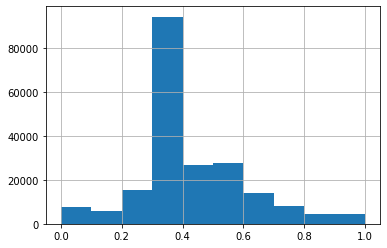

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].hist()

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].describe()

count    209153.000000
mean          0.419776
std           0.181657
min           0.000000
25%           0.327797
50%           0.357297
75%           0.519810
max           1.000000
Name: Conceito Enade (Contínuo) - normalizado, dtype: float64

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].mode()

0    0.339849
dtype: float64

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].unique()

array([0.76418838, 0.58945556, 0.6353539 , 0.48218448, 0.46729796,
       0.37163794, 0.56390283, 0.46519831, 0.72471497, 0.87794738,
       0.54817645, 0.39958427, 0.56474269, 0.62997879, 0.44394986,
       0.6149453 , 0.41762026, 0.23329204, 0.39803053, 0.6892309 ,
       0.36664077, 0.39036681, 0.55602914, 0.51714364, 0.41783022,
       0.43047011, 0.        , 0.49488735, 0.42807651, 0.53826611,
       0.51571588, 0.31534634, 0.50819913, 0.32916203, 0.53213513,
       0.42171457, 0.43687404, 0.58613811, 0.38849812, 0.5215529 ,
       0.43288471, 0.3742415 , 0.18709975, 0.44756126, 0.43637013,
       0.49839377, 0.18495811, 0.65737922, 0.4575136 , 0.2533227 ,
       0.51267138, 0.38362693, 0.31820186, 0.05190333, 0.33984925,
       0.66911626, 0.64568417, 0.33814853, 0.46897768, 0.82528818,
       0.53992483, 0.47913998, 0.49568522, 0.35729733, 0.33743465,
       0.42415017, 0.36038382, 0.49692401, 0.26993092, 0.6568753 ,
       0.3215403 , 0.51496   , 0.07113612, 0.57072669, 0.49992

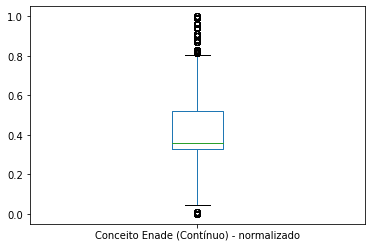

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].plot.box()

## - Estatísticas descritivas dos dados com visualizações

In [ ]:
df[['Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)', 'IDADE']].describe()
#Essas sao as colunas que podemos fazer consultas sobre dados numéricos

In [ ]:
#Fazemos uma contagem em relação ao nome do curso da bolsa, especialmente porque queremos saber 
#a totalização de algumas colunas por curso, como cpf, que vai nos informar o total pessoas por 
#curso, por exemplo
GROUPED_BY_NOME_CURSO_BOLSA=df.groupby('NOME_CURSO_BOLSA').count()
GROUPED_BY_NOME_CURSO_BOLSA

In [ ]:
# Qual a média e a mediana do conceito enade por estado no brasil?
GROUPED_BY_UF=df.groupby('Sigla da UF').agg(['mean','median'])['Conceito Enade (Faixa)']
GROUPED_BY_UF

,mean,median
Sigla da UF,,
AC,2.210341,2.0
AL,1.912424,2.0
AM,3.026581,3.0
AP,1.804845,2.0
BA,2.482867,3.0
CE,2.678988,3.0
DF,2.828947,3.0
ES,3.304962,4.0
GO,2.376994,2.0


In [ ]:
#Qual estados tem a maior e menor média de idade de alunos no prouni?
GROUPED_BY_UF_AGE=df.groupby('Sigla da UF').agg(['mean','median'])['IDADE']
GROUPED_BY_UF_AGE

In [ ]:
# Cursos que tiveram mais de 1200 beneficiarios.
GROUPED_BY_NOME_CURSO_BOLSA[GROUPED_BY_NOME_CURSO_BOLSA['CPF_BENEFICIARIO_BOLSA'] > 1200]['NOME_IES_BOLSA'].plot.bar(x='NOME_CURSO_BOLSA', stacked=True)

In [ ]:
# Distribuição de alunos por organização acadêmica 
df['Organização Acadêmica'].hist()

In [ ]:
# Distribuição de nascimento dos beneficiários em relação a quantidade
df['DT_NASCIMENTO_BENEFICIARIO'].hist()

In [ ]:
# Distribuição da quantidade de beneficiários por sexo
sns.catplot(x="SEXO_BENEFICIARIO_BOLSA", kind="count", palette="ch:.25", data=df)

In [ ]:
#Qual sexo das pessoas que estiveram em 2019 no Prouni com mais de 45 anos de idade?
df[df['IDADE']>45]['SEXO_BENEFICIARIO_BOLSA'].hist()

In [ ]:
#Distribuição de categoria administrativa
df['Categoria Administrativa'].hist()

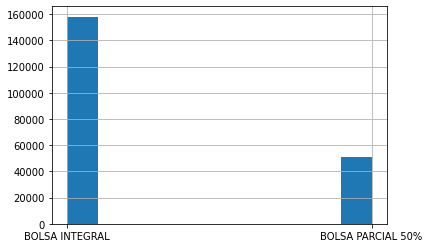

In [ ]:
#Distribuição por tipo de bolsa
df['TIPO_BOLSA'].hist()

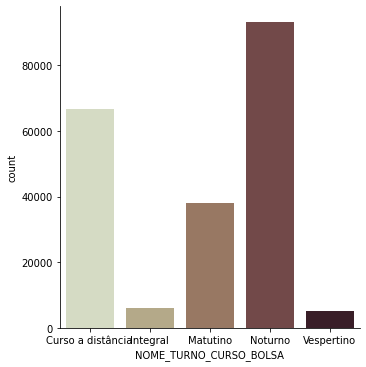

In [ ]:
#Distribuição por tipos de turno
sns.catplot(x="NOME_TURNO_CURSO_BOLSA", kind="count", palette="ch:.55", data=df)

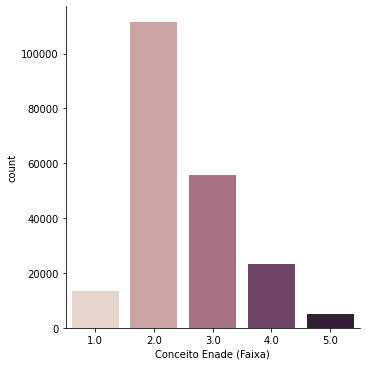

In [ ]:
#Distribuição por conceito Enade (faixa)
sns.catplot(x="Conceito Enade (Faixa)", kind="count", palette="ch:.15", data=df)

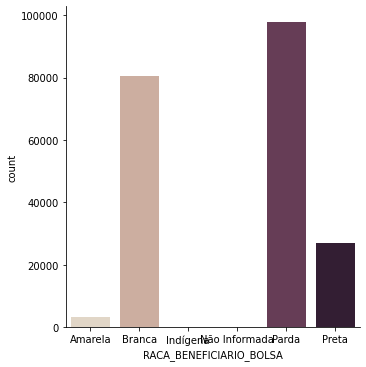

In [ ]:
#Distribuição por raça
sns.catplot(x="RACA_BENEFICIARIO_BOLSA", kind="count", palette="ch:.25", data=df)

In [ ]:
#Quantas pessoas indigenas receberam bolsa integral?
df[(df['TIPO_BOLSA'] == 'BOLSA INTEGRAL') & (df['RACA_BENEFICIARIO_BOLSA']=='Indígena')].shape[0]

143

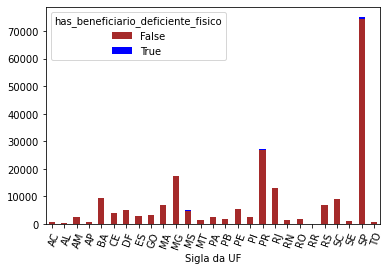

In [ ]:
#Quais estados tem mais beneficiarios deficientes?
df['has_beneficiario_deficiente_fisico'] = df['BENEFICIARIO_DEFICIENTE_FISICO'].str.contains("S")
df_grouped_color = (df.groupby(['Sigla da UF'])
                    ['has_beneficiario_deficiente_fisico']
                    .value_counts()
                    .unstack()
                    .reset_index(level=0, drop=False))

df_grouped_color


ax = df_grouped_color.plot.bar(stacked=True, color=['brown', 'blue'])
ax.set_xticklabels(labels=df_grouped_color['Sigla da UF'], rotation=70, rotation_mode="anchor", ha="right")
ax.set_xlabel('Sigla da UF')
ax.set_ylabel('');


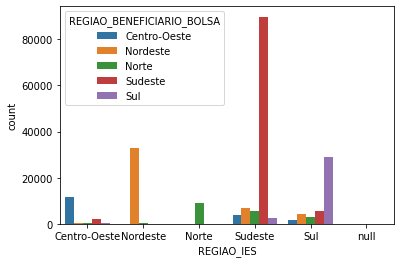

In [ ]:
#Distribuicao da regiao do beneficiario da bolsa em relacao a reigiao da IES da bolsa
sns.countplot(x="REGIAO_IES", hue="REGIAO_BENEFICIARIO_BOLSA", data=df)

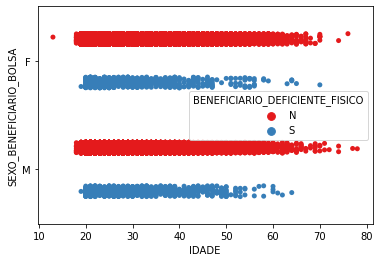

In [ ]:
#Distribuicao por idade, sexo do beneficiario da bolsa demarcado por cores diferentes (hue) para assinalar se o beneficiario é deficiente fisico ou nao.
# Podemos obeservar que pessoas deficientes com mais de 50 anos é mais raro estarem nas IES.
sns.stripplot(x="IDADE", y="SEXO_BENEFICIARIO_BOLSA", hue="BENEFICIARIO_DEFICIENTE_FISICO", data=df, palette="Set1", dodge=True)

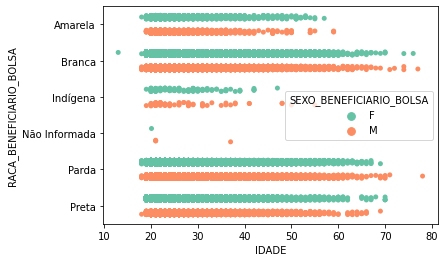

In [ ]:
# Distribuicao de dados por idade, raca e sexo. Nesse caso, a visualizacao no irforma que as pessoas indigenas geralmente que estao nas IES tem entre 20 e
# e 45 anos aproximadamente, diferentemente das outras categorias raciais assinaladas e desconsiderando a categoria nao informada.
sns.stripplot(x="IDADE", y="RACA_BENEFICIARIO_BOLSA", hue="SEXO_BENEFICIARIO_BOLSA", data=df, palette="Set2", dodge=True)

In [ ]:
 #Distribuicao por regiao do beneficiario bolsista, idade, e PCD. A visualizacao, entre outras coisas, nos informar que as as pessoas do sexo feminino
 # quando idosas, não fazem parte do corpo de bolsistas do Prouni.
 sns.stripplot(x="IDADE", y="REGIAO_BENEFICIARIO_BOLSA", hue="BENEFICIARIO_DEFICIENTE_FISICO", data=df, palette="Set2", dodge=True)


In [ ]:
#Esse grafico mostra a disutribuicao do conceito enade por regiao, observamos que a regiao sudeste é que é mais contemplada no range possível.
sns.catplot(x="Conceito Enade (Contínuo)", y="REGIAO_IES",jitter=False, data=df)

In [ ]:
#Essa visualizacao nos reitera que os estados das regioes norte, nordeste sao os que os menores bolsistas com idade mais avancada.
sns.catplot(x="IDADE", y="SIGLA_UF_BENEFICIARIO_BOLSA",jitter=False, data=df)

In [ ]:
#Essa visualizacao nos informa que a maioria das bolsas sao para pessoas brancas e pardas. Enquanto pessoas pretas e indígenas sao minorias.
sns.countplot(x="TIPO_BOLSA", hue="RACA_BENEFICIARIO_BOLSA", data=df)

In [ ]:
#Esse grafico de barras nos informa que no sudeste do Brasil se concentra a maioria dos beneficiarios, e eles em maioria, também sao brancos e pardas.
sns.countplot(x="REGIAO_IES", hue="RACA_BENEFICIARIO_BOLSA", data=df)

In [ ]:
# Essa visualizacao de barra distribuida por sexo, nos informa que em todas as regioes do Brasil, pessoas do sexo feminino sao maioria.
sns.countplot(x="REGIAO_IES", hue="SEXO_BENEFICIARIO_BOLSA", data=df)

In [ ]:
# Essa visualizacao nos informa que a taxa de pessoas vao fazer o curso no turno integral e vespertino é baixa em relacao aos demais turnos.
sns.catplot(y="NOME_TURNO_CURSO_BOLSA", hue="RACA_BENEFICIARIO_BOLSA", kind="count", palette="pastel", edgecolor=".6", data=df)

In [ ]:
#Essa distribuicao, nos informa que o fenomeno da migracao ocorre para a regiao sul e sudeste em maior freuqencia que nas demais.
sns.countplot(x="REGIAO_IES", hue="REGIAO_BENEFICIARIO_BOLSA", data=df)

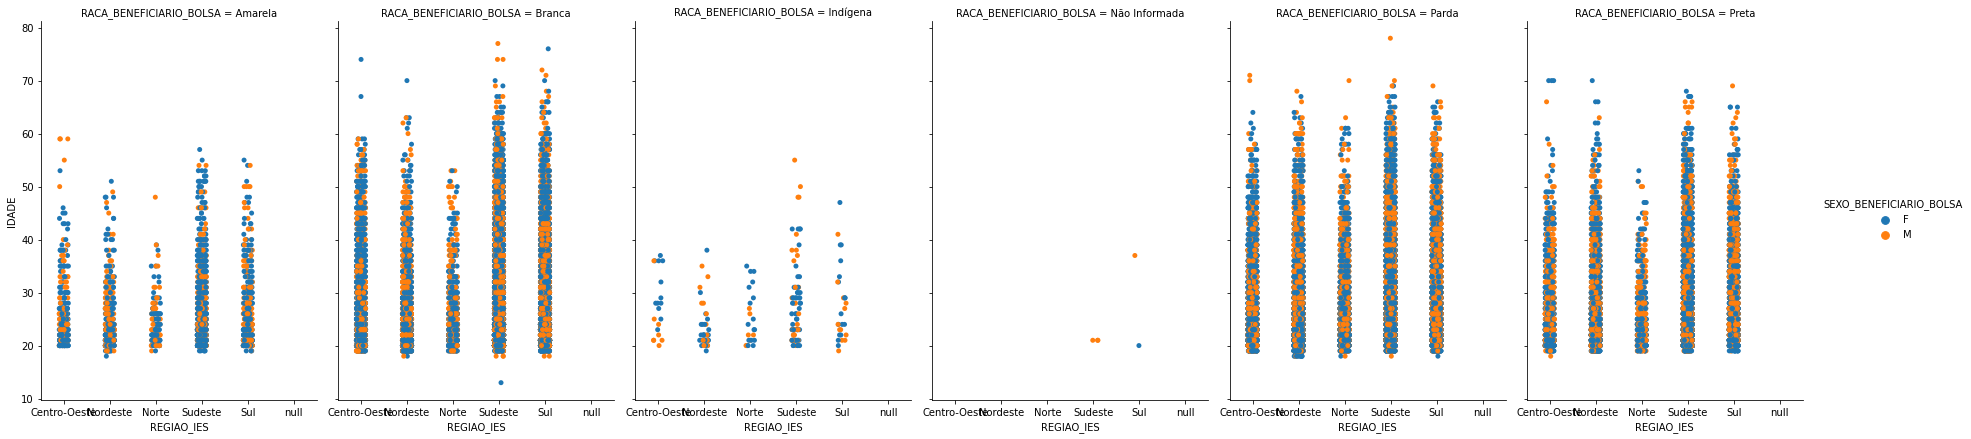

In [ ]:
#Essa visualizacao nos informa que pessoas indigenas vao para todas as regioes do BR, mas principalmente pra o sudeste e tem menos de 60 anos.
sns.catplot(x="REGIAO_IES", y="IDADE", hue="SEXO_BENEFICIARIO_BOLSA", col="RACA_BENEFICIARIO_BOLSA", data=df, kind="strip", height=6, aspect=.7);

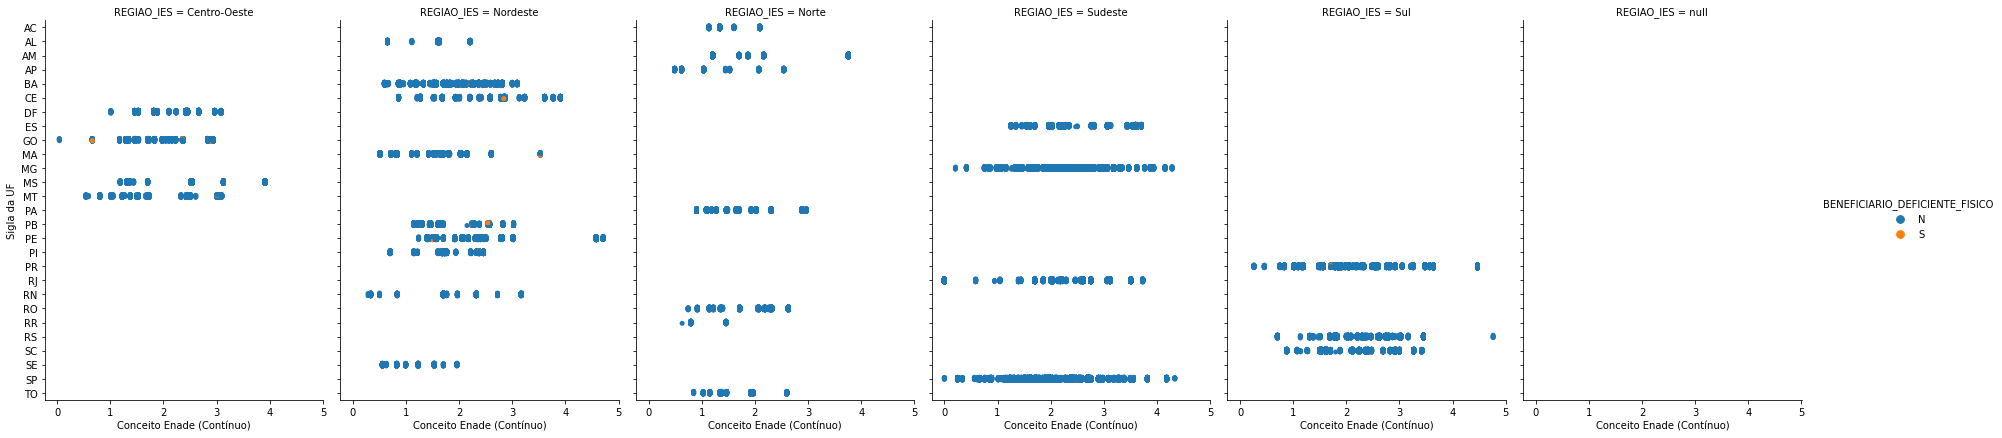

In [ ]:
# Esse grafico nos detalha a distribuicao do conceito enade por estado no brasil, e quais estados tem beneficiarios dificientes, dando destaque ao, CE, GO, PB.
sns.catplot(x="Conceito Enade (Contínuo)", y="Sigla da UF",nhue="BENEFICIARIO_DEFICIENTE_FISICO", col="REGIAO_IES",data=df, kind="strip",height=6, aspect=.7);

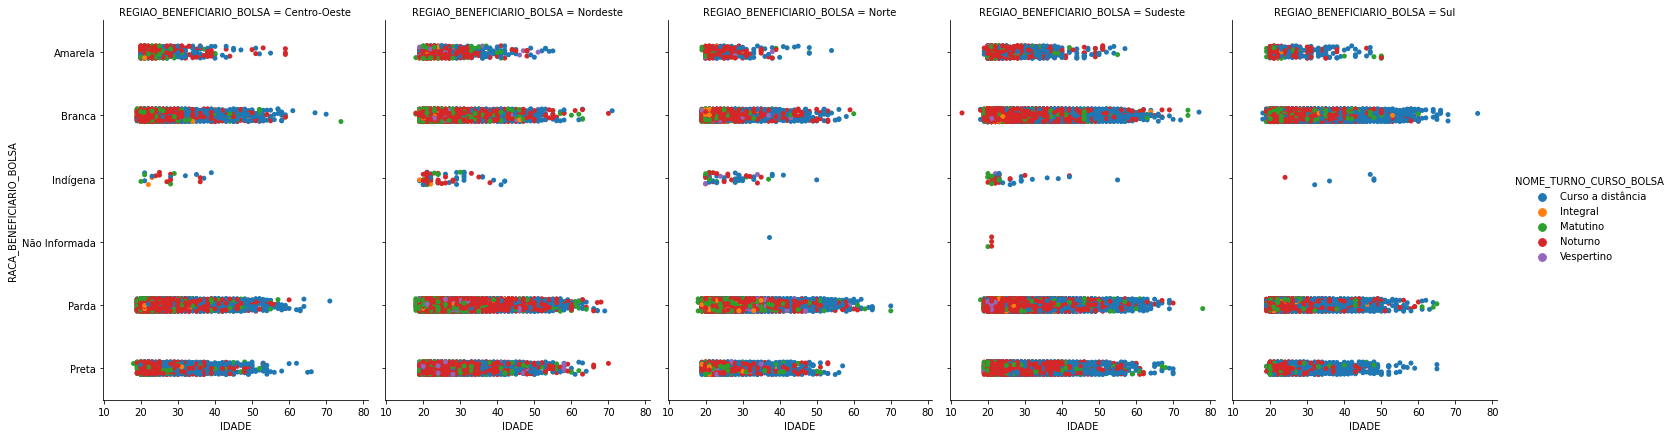

In [425]:
#Nessa visualização podemos observar que as pessoas mais jovens, geralmente, fazem cursos em turno noturno
sns.catplot(x="IDADE", y="RACA_BENEFICIARIO_BOLSA", hue="NOME_TURNO_CURSO_BOLSA", col="REGIAO_BENEFICIARIO_BOLSA",data=df, kind="strip",height=6, aspect=.7);

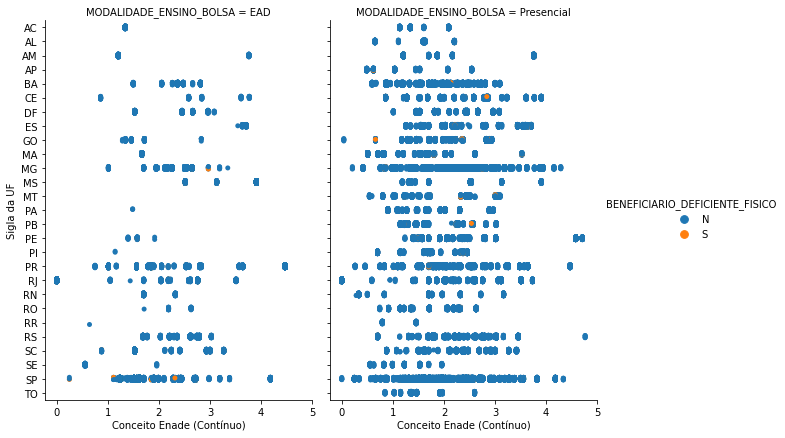

In [427]:
#Essa visualização nos mostra que pouquíssimos estados tem beneficiários deficientes
sns.catplot(x="Conceito Enade (Contínuo)", y="Sigla da UF",hue="BENEFICIARIO_DEFICIENTE_FISICO", col="MODALIDADE_ENSINO_BOLSA", data=df, kind="strip",height=6, aspect=.7);


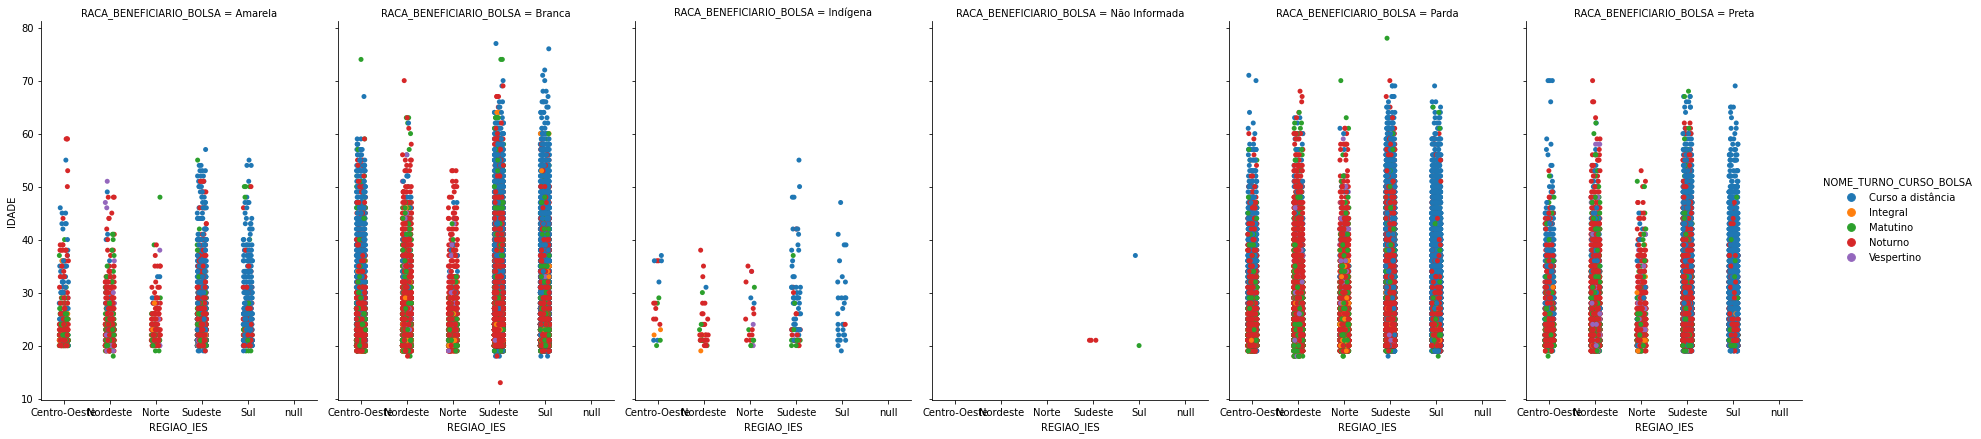

In [428]:
#Essa visualização nos mostra que pessoas indígenas estão em todas regiões do brasil. Mas dividindo em norte e sul, as pessoas indigenas do norte fazem cursos noturnos e do sul preferem fazer ead.
sns.catplot(x="REGIAO_IES", y="IDADE", hue="NOME_TURNO_CURSO_BOLSA", col="RACA_BENEFICIARIO_BOLSA",data=df, kind="strip",height=6, aspect=.7);

## - Teste de hipóteses para comparação de valores de categorias e visualizar diferenças. 

In [430]:
#O conceito enade (Faixa) de Pernambuco é maior que o do resto do Brasil?
enade_PE = df[(df['Sigla da UF'] == 'PE')]['Conceito Enade (Faixa)'].to_numpy()
enade_BR = df[(df['Sigla da UF'] != 'PE')]['Conceito Enade (Faixa)'].to_numpy()
stat, p = mannwhitneyu(enade_PE, enade_BR, alternative= 'less')
print('Statistics=%.3f, p=%.3f' % (stat, p))



Statistics=753392649.000, p=1.000


In [429]:
#A idade média de Pernambuco é maior que o do resto do Brasil?
enade_PE = df[(df['Sigla da UF'] == 'PE')]['IDADE'].to_numpy()
enade_BR = df[(df['Sigla da UF'] != 'PE')]['IDADE'].to_numpy()
stat, p = mannwhitneyu(enade_PE, enade_BR, alternative= 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))



Statistics=471732981.500, p=0.000


## Referências de artigos do domínio
https://revistas.ufrj.br/index.php/rce/article/view/3224/7585 - 08/03/2021 14:40
http://dadosabertos.mec.gov.br/images/conteudo/fies/2019/OFERTA_20191.csv - 09/03/2020 16:20
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/indicadores-de-qualidade-da-educacao-superior - 15/03/2021 20:15